In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import calculation_functions as cf

In [2]:
# building parameters
thickness = cf.thickness
length = cf.length
height = cf.height
setup_height = cf.setup_height

In [3]:
def our_plot(x, y, title, xlabel, ylabel, labels=[' '],xmin=0, xmax=90):
    plt.figure(figsize=(6.7, 6))  # (width, height in inches)

    color = ['b', 'orange', 'green']
    for i in range(len(y)):
        plt.plot(x, y[i], label=labels[i], color=color[i], linewidth = 2)
    
    plt.title(title, fontsize=14)#, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    
    plt.xlim(xmin, xmax)
    #plt.ylim(0, 7e6)
    
    # plt.xticks(np.arange(0, 11, 2))  # Set x-ticks at 0, 2, 4, 6, 8, 10
    # plt.yticks(np.arange(0, 9, 1))   # Set y-ticks at 0, 1, 2, ... 8
    
    plt.tick_params(axis='both', which='major', labelsize=10, direction='in')

    plt.legend(loc='upper right', fontsize=10)

    
    # plt.legend(loc='upper right', fontsize=10)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    
    plt.show()

# Plots

### Pathlength

In [4]:
ceiling = cf.ceil_b(thickness, height, setup_height)
t = cf.thetas(0, 90.5, 1)

tot_path = np.array([cf.total_path(theta, ceiling, length) for theta in t[1]])

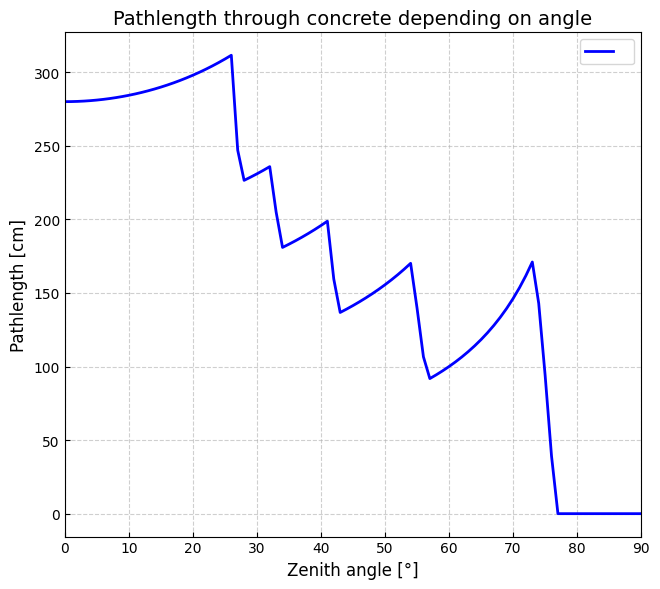

In [5]:
our_plot(t[0], np.array([tot_path]), 'Pathlength through concrete depending on angle', 'Zenith angle [°]', 'Pathlength [cm]')

### Calculate complete energy loss

$E_{loss} = \frac{dE}{dx} * \rho * l$

In [6]:
ceiling = cf.ceil_b(thickness, height, setup_height)
t = cf.thetas(0, 90.5, 1)

En_loss = np.array([cf.E_loss(theta, ceiling, length, cf.dEdx, cf.rho) for theta in t[1]])

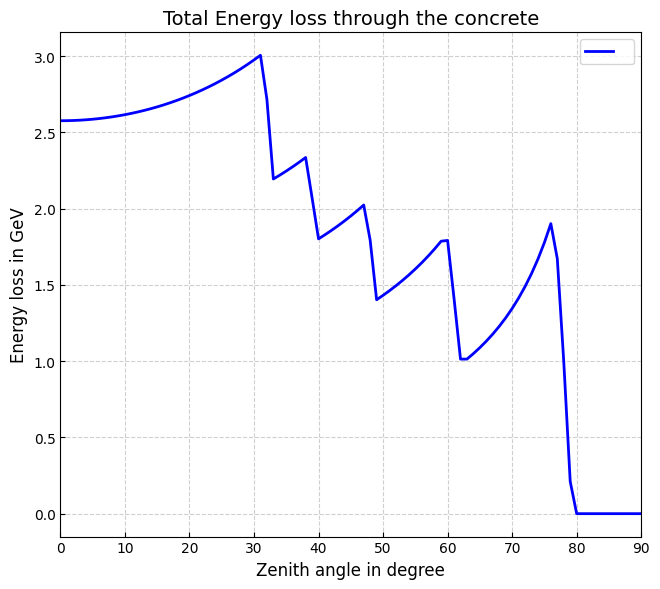

In [7]:
our_plot(t[0], np.array([En_loss]), 'Total Energy loss through the concrete', 'Zenith angle in degree', 'Energy loss in GeV')

### Calculate muon flux from Shukla equation

$I(E, \theta) = I_0 N (E_0 + E)^{-n} D(\theta)^{-(n-1)}$

$D_2(\theta) = \frac{1}{cos(\theta)}$

In [8]:
theta_starts = cf.thetas(0, 90, cf.binsize)
ceiling_b = cf.ceil_b(thickness, height, setup_height)
ceiling_3 = cf.ceil_3(thickness, height, setup_height)

In [9]:
I_3floor = np.array([cf.I_in(cf.mean_theta(theta), ceiling_3, length) for theta in theta_starts[1]])
I_3floor

array([50.49925903, 49.60864302, 47.85875298, 45.31125141, 42.05610611,
       38.20863492, 33.90568687, 29.30105343, 24.56021165, 19.85449531,
       15.35475951, 11.22452954,  7.61245981,  4.64356963,  2.40791196,
        1.82052465,  1.27960043,  0.18375763])

In [10]:
I_basement = np.array([cf.I_in(cf.mean_theta(theta), ceiling_b, length) for theta in theta_starts[1]])
I_basement

array([25.25313634, 24.71415352, 23.66050038, 22.13972558, 20.22048644,
       17.98941892, 19.16808746, 17.33842261, 17.48169239, 14.05906623,
       13.63119338,  9.8525025 ,  9.66294044,  6.10478232,  3.32524781,
        1.82052465,  1.27960043,  0.18375763])

In [11]:
theta_samples = np.linspace(0, np.pi/2, 2000)

y_samples = np.array([cf.I_in_int(t, ceiling_3, length) for t in theta_samples])

result = simpson(y_samples, x=theta_samples)

print(f"Result 3rd floor: {result} Hz/m²")

Result 3rd floor: 94.17520854821798 Hz/m²


In [12]:
theta_samples = np.linspace(0, np.pi/2, 2000)

y_samples = np.array([cf.I_in_int(t, ceiling, length) for t in theta_samples])

result = simpson(y_samples, x=theta_samples)

print(f"Result inside: {result} Hz/m²")

Result inside: 63.13284579582201 Hz/m²


In [13]:
74/117.33

0.6306997357879486

In [14]:
32451/50980

0.6365437426441742

In [15]:
5/8

0.625

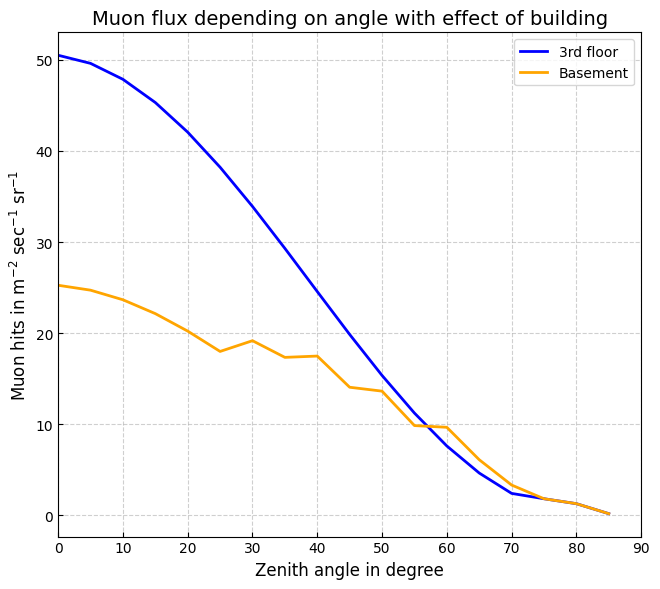

In [16]:
our_plot(theta_starts[0], np.array([I_3floor, I_basement]),
         'Muon flux depending on angle with effect of building',
         'Zenith angle in degree',
         r'Muon hits in $\text{m}^{-2} \text{ sec}^{-1} \text{ sr}^{-1}$',
         ['3rd floor', 'Basement'])

## Certain Angle Measurement

In [17]:
acc_angle = 26.6 # °
angle = np.deg2rad(acc_angle)
d_area = 0.1380 # m²
four_h = 4 * 60 * 60

In [18]:
basemuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_b, angle)
basemuons # Hz/m²

np.float64(14.481502753646218)

In [19]:
basemuons_s = basemuons * d_area
basemuons_s # Hz

np.float64(1.9984473800031783)

In [20]:
basemuons4 = basemuons_s * four_h
basemuons4

np.float64(28777.642272045767)

In [21]:
topmuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_3, angle)
topmuons

np.float64(29.708907892882785)

In [22]:
topmuons_s = topmuons * d_area
topmuons_s

np.float64(4.0998292892178245)

In [23]:
topmuons4 = topmuons_s * four_h
topmuons4

np.float64(59037.54176473667)

In [24]:
basemuons4/topmuons4

np.float64(0.4874464859448933)

## Calculate muon flux depending on wall thickness

In [25]:
cf.muon_flux(100, 250, 0)

np.float64(47.05144558369113)

In [26]:
t = np.arange(0, 100, 1)
flux_t = np.array([cf.muon_flux(thick, height, setup_height, cf.ceil_3, angle=np.deg2rad(26.6))*1380/10000*4*60*60 for thick in t])
flux_t

array([74091.52572456, 73736.92216627, 73384.83596214, 73035.24343506,
       72688.12118509, 72343.44608556, 72001.19527926, 71661.34617465,
       71323.87644223, 70988.76401086, 70655.98706418, 70325.52403713,
       69997.35361247, 69671.45471735, 69347.80651999, 69026.38842638,
       68707.18007702, 68390.16134374, 68075.31232653, 67762.6133505 ,
       67452.04496277, 67143.58792953, 66837.22323304, 66532.93206876,
       66230.6958425 , 65930.49616757, 65632.31486204, 65336.133946  ,
       65041.93563887, 64749.70235678, 64459.41670995, 64171.06150011,
       63884.61971803, 63600.07454098, 63317.40933033, 63036.60762908,
       62757.65315957, 62480.52982107, 62205.22168753, 61931.71300527,
       61659.9881908 , 61390.03182856, 61121.82866882, 60855.36362549,
       60590.62177406, 60327.58834952, 60066.2487443 , 59806.58850628,
       59548.59333683, 59292.24908882, 59037.54176474, 58784.45751476,
       58532.98263492, 58283.10356526, 58034.80688802, 57788.07932584,
      

In [27]:
np.where(np.isclose(flux_t, 51055.32432972))

(array([85]),)

In [28]:
t.shape

(100,)

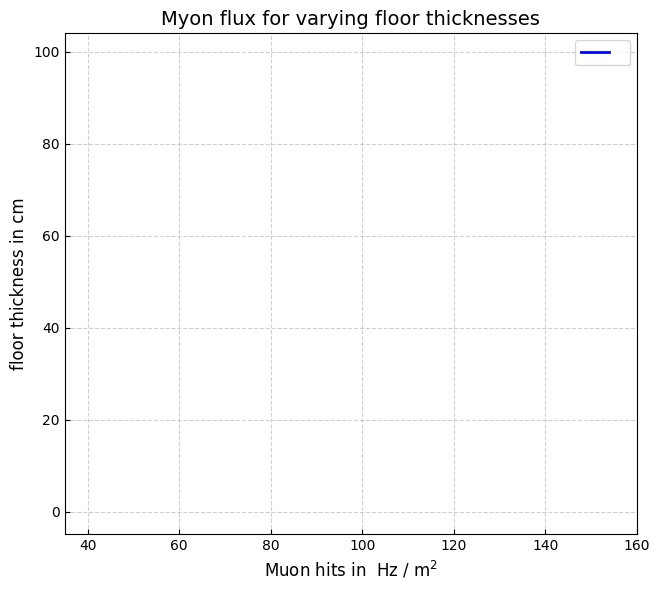

In [29]:
our_plot(flux_t, np.array([t]),
         'Myon flux for varying floor thicknesses',
         r'Muon hits in $\text{ Hz }/\text{ m}^{2}$',
         'floor thickness in cm',
        xmin=35,
        xmax=160)